<a href="https://colab.research.google.com/github/nvjkv/PORTFOLIO/blob/main/Predict_Sales_Revenue_with_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Predict Sales Revenue**

In [1]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## **EDA**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


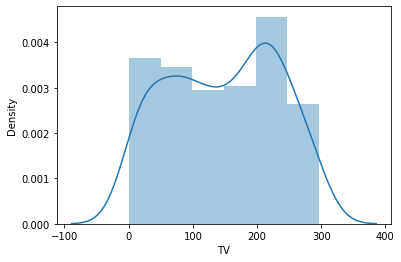

In [5]:
sns.distplot(df.TV)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


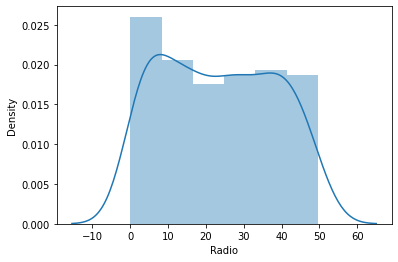

In [6]:
sns.distplot(df.Radio)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


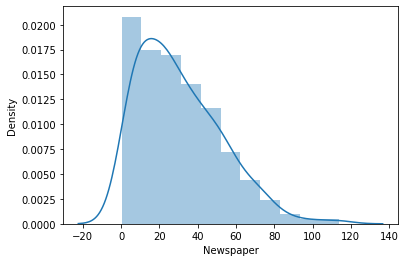

In [7]:
sns.distplot(df.Newspaper)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


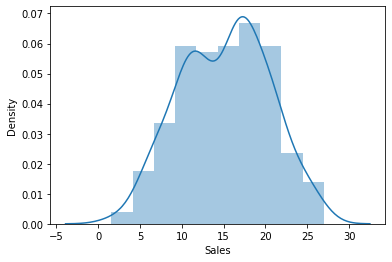

In [8]:
sns.distplot(df.Sales)

From the above, the "TV" column has sort of uniform distribution with spend of TV much higher as compared to those of Radio and Newspaper. The "Radio" column 
has also uniform distribution with spend on radio of a uniform distribution.
The "Newspaper" columnis right skewed with the price at which newspaper is sold is very low. The "Sales" column is normally distributed.

## **Relationship between Predictors and Response**

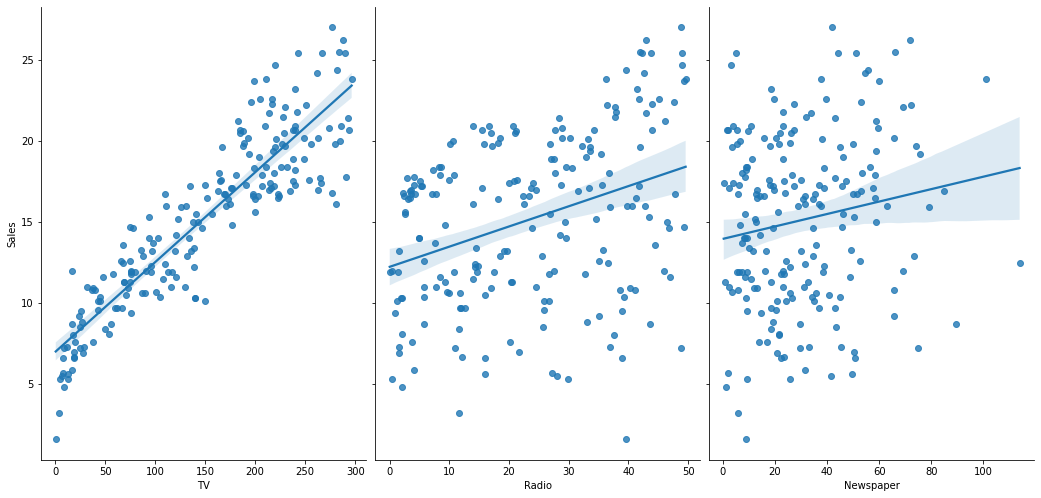

In [9]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=7, 
            aspect=0.7, kind='reg')

The chart shows that spend on TV is the highest correlated with Sales. There is weak correlation between Radio and Sales, and Newspaper and Sales

In [10]:
# correlation value between TV and Sales
df.TV.corr(df.Sales)

0.9012079133023306

In [11]:
# correlation value between Radio and Sales
df.Radio.corr(df.Sales)

0.3496310970076693

In [12]:
# correlation value between Newspaper and Sales
df.Newspaper.corr(df.Sales)

0.15796002615492621

In [13]:
# correlation between values
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


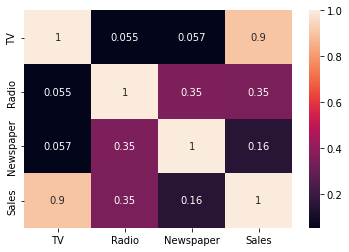

In [14]:
# heatmap showing the correlation values
sns.heatmap(df.corr(), annot=True)

The "TV" variable is highly correlated with "Sales" and only these two variables will be used to construct the model, and rthe model which we will build is Simple Linear Regression.

### **Test-Train Split**

In [15]:
X = df[['TV']]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [16]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 1)


In [17]:
y = df[['Sales']]
y.head()

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9


In [18]:
print(type(y))
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 1)


In [19]:
 # train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=1)

In [20]:
# display the shape of each of the train test dataframe
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 1)
(50, 1)
(150, 1)
(50, 1)


## **Simple Linear Regression Model**

In [21]:
# Creating the model
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [22]:
print(regression_model.intercept_)
print(regression_model.coef_)

[6.9027181]
[[0.05565473]]


### Predictions wioth the model

In [24]:
y_pred = regression_model.predict(X_test)
y_pred[:5]

array([18.6667951 , 18.20643751, 12.28280002, 22.51605017, 21.05178023])

 Model Evaluation 

In [25]:
from sklearn import metrics

In [26]:
# calculate RMSE (Root mean Squared Error)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

2.252987831320066
